In [1]:
###  Import modules

import numpy as np
# import scipy.io as sio
import matplotlib.pyplot as plt
import pysindy as ps



In [2]:
%%javascript
require("notebook/js/notebook").Notebook.prototype.scroll_to_bottom = function () {}

<IPython.core.display.Javascript object>

In [3]:
###  Set filename and pathname


# Re = 50
# t_trm_1 = 24750
# t_trm_2 = 49750
# TD_Embed_a = -3.20
# TD_Embed_b = 3.20
# tde_mult=2


# Re = 62
# TD_Embed_a = -2.00
# TD_Embed_b = 2.00
# t_trm_1 = 7500
# t_trm_2 = 22500
# tde_mult=1


# Re = 75
# TD_Embed_a = -1.80
# TD_Embed_b = 1.80
# t_trm_1 = 5000
# t_trm_2 = 17500
# tde_mult=1


# Re = 87

# # t_trm_1 = 0
# # t_trm_2 = -1

# # t_trm_1 = 0
# # t_trm_2 = 10000

# t_trm_1 = 2500
# t_trm_2 = 15000




Re = 100
TD_Embed_a = -2.00
TD_Embed_b = 2.00
t_trm_1 = 4000
t_trm_2 = 12000
tde_mult=1





In [4]:
###  Time-Delay Embedding Parameters

# TD_Embed_a = 0.10
# TD_Embed_b = 3.90


TD_Embed_n = int( (TD_Embed_b - TD_Embed_a) / (0.02 * tde_mult) + 1 )

TD_Embed_vec = np.linspace(TD_Embed_a , TD_Embed_b , TD_Embed_n, endpoint=True)




###  SINDy Parameters

threshold              = 0.0

differentiation_method = ps.FiniteDifference(order=2)
feature_library        = ps.PolynomialLibrary(degree=3)
optimizer              = ps.STLSQ(threshold=threshold)


###  Other parameters

should_normalize = True



In [5]:
TD_Embed_vec

array([-2.  , -1.98, -1.96, -1.94, -1.92, -1.9 , -1.88, -1.86, -1.84,
       -1.82, -1.8 , -1.78, -1.76, -1.74, -1.72, -1.7 , -1.68, -1.66,
       -1.64, -1.62, -1.6 , -1.58, -1.56, -1.54, -1.52, -1.5 , -1.48,
       -1.46, -1.44, -1.42, -1.4 , -1.38, -1.36, -1.34, -1.32, -1.3 ,
       -1.28, -1.26, -1.24, -1.22, -1.2 , -1.18, -1.16, -1.14, -1.12,
       -1.1 , -1.08, -1.06, -1.04, -1.02, -1.  , -0.98, -0.96, -0.94,
       -0.92, -0.9 , -0.88, -0.86, -0.84, -0.82, -0.8 , -0.78, -0.76,
       -0.74, -0.72, -0.7 , -0.68, -0.66, -0.64, -0.62, -0.6 , -0.58,
       -0.56, -0.54, -0.52, -0.5 , -0.48, -0.46, -0.44, -0.42, -0.4 ,
       -0.38, -0.36, -0.34, -0.32, -0.3 , -0.28, -0.26, -0.24, -0.22,
       -0.2 , -0.18, -0.16, -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04,
       -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,
        0.16,  0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,
        0.34,  0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,
        0.52,  0.54,

In [6]:
### 

In [7]:
###  Set loading strings

stem = '/Users/josephwilliams/Documents/Data_Results/Coarse-Grained-Vortex-Shedding/Vortex Shedding Data/Coefficients of Lift, Drag/'
filename = stem + 'Re' + str(Re) + '/ibpm.force'



In [8]:
###  Load data

data = np.genfromtxt(filename, dtype="f8", delimiter=" ")
t =   data[t_trm_1 : t_trm_2, 1]
C_l = data[t_trm_1 : t_trm_2, 3]
C_d = data[t_trm_1 : t_trm_2, 2]

# normalize
if should_normalize == True: C_l = C_l / np.max(np.abs(C_l))

# adjust t
t = t-t[0]

# Derived quantites
dt = t[1]-t[0]

 




In [9]:
###  

In [10]:
# ###  Plot the data


# # Both on 1 plot
# plt.figure()
# plt.plot(t_Ovlp, data_1,  linewidth=3, color='b' , label='$C_l(t_1)$' ) # 
# plt.plot(t_Ovlp, data_2,  linewidth=3, color='g' , label='$C_l(t_2)$' ) # 
# plt.xlabel('t', fontsize=20)
# plt.ylabel('Signal', fontsize=20)
# plt.legend(fontsize=14)
# plt.show()


# # 2 Separate plots 
# plt.figure(figsize=(16, 4))
# ttl_str = r'$C_l(t_1)$ and $C_l(t_2)$, Re = ' + str(Re)
# plt.suptitle(ttl_str, fontsize=20, horizontalalignment='center')

# plt.subplot(1, 2, 1)
# plt.plot(t_Ovlp, data_1,  linewidth=3, color='r') # 
# plt.xlabel('t', fontsize=20)
# plt.ylabel('$C_l(t_1)$', fontsize=20)

# plt.subplot(1, 2, 2)
# plt.plot(t_Ovlp, data_2,  linewidth=3, color='r') # 
# plt.xlabel('t', fontsize=20)
# plt.ylabel('$C_l(t_2)$', fontsize=20)

# plt.show()


# # Phase space
# plt.figure()
# plt.plot(data_1, data_2,  linewidth=3, color='r') # 
# plt.xlabel('$C_l(t_1)$', fontsize=20)
# plt.ylabel('$C_l(t_2)$', fontsize=20)
# ttl_str = 'Phase Space of [$C_l(t_1)$, $C_l(t_2)$], Re = ' + str(Re)
# plt.title(ttl_str, fontsize=20)
# plt.axis('equal')
# plt.show()


# # Drag
# plt.figure(figsize=(16, 4))
# plt.plot(t, C_d,  linewidth=3, color='r')
# plt.xlabel('t', fontsize=20)
# plt.ylabel('$C_d$', fontsize=20)
# ttl_str = 'Coefficient of Drag, Re = ' + str(Re)
# plt.title(ttl_str, fontsize=20, horizontalalignment='right')
# plt.show()



In [11]:
###  

In [12]:
# Compare amplitudes of the two signals


# print('')
# print('Max of C_l(t_1) = ' + str(np.max(data_1)) )
# print('Max of C_l(t_2) = ' + str(np.max(data_2)) )
# print('\n')



In [13]:
###  

In [14]:
###  Initiate and run SINDy

n_terms = 10


NMSE_1 = np.zeros(( TD_Embed_n , ))
NMSE_2 = np.zeros(( TD_Embed_n , ))


Coefs_u1 = np.zeros(( TD_Embed_n , n_terms ))
Coefs_u2 = np.zeros(( TD_Embed_n , n_terms ))



feature_names = ["x", "y"]


model = ps.SINDy(
    differentiation_method=differentiation_method,
    feature_library=feature_library,
    optimizer=optimizer,
    feature_names=feature_names,)



for TD_Embed_iter in range ( TD_Embed_n ):
    if np.mod(TD_Embed_iter , TD_Embed_n//10) == 0: print('Iteration  =  '+str(TD_Embed_iter)+'  /  '+str(TD_Embed_n-1))
        ### Time-Delay Embed

    TD_Embed = TD_Embed_vec[TD_Embed_iter]
    
#     t_1 = t
#     t_2 = t+TD_Embed
#     TD_Embed_Index = np.argmin( np.abs(t - TD_Embed) )
#     TD_Embed_backendIndex = np.argmin( np.abs( t_2 - np.max(t_1) ) ) 

#     data_1 = C_l[TD_Embed_Index:-1 ]        # ; data_1 = data_1 / np.max(np.abs(data_1))
#     data_2 = C_l[0:TD_Embed_backendIndex ]  # ; data_2 = data_2 / np.max(np.abs(data_2))
#     t_Ovlp = t[TD_Embed_Index:-1]
    
    
    TD_Embed_idx = int( TD_Embed / dt )

    data_1 = data[t_trm_1 : t_trm_2, 3]
    data_2 = data[t_trm_1 + TD_Embed_idx : t_trm_2 + TD_Embed_idx, 3]
    t_Ovlp = data[t_trm_1 : t_trm_2, 1]
    
    data_1_dt = ps.FiniteDifference(axis=0)._differentiate(data_1   , dt)
    data_2_dt = ps.FiniteDifference(axis=0)._differentiate(data_2   , dt)

    

#     X = np.asarray([data_1, data_2]).T
#     model.fit(X, t=t_Ovlp)
    
    
    subSamp_rate = 1
#     subsampled_data = data_1[::subSamp_rate]
    X = np.asarray([data_1[::subSamp_rate], data_2[::subSamp_rate]]).T
    t_Ovlp = t_Ovlp[::subSamp_rate]
    model.fit(X, t=t_Ovlp)
    
    coefs = model.coefficients()
    
    Coefs_u1[TD_Embed_iter , :] = coefs[0,:]
    Coefs_u2[TD_Embed_iter , :] = coefs[1,:]

#     print('')
#     print('x = C_l(t_2)')
#     print('y = C_l(t_1)')
#     print('\n')
#     model.print(precision=4)
#     print('\n')
#     model.print(precision=10)
#     print('\n')


    # Numerical solution
    X0 = X[0,:]
    x_test_sim = model.simulate(X0, t_Ovlp , integrator_kws={'atol': 1e-6, 'method': 'RK45', 'rtol': 1e-6})  # 
#     error_1 = data_1 - x_test_sim[:,0]
#     error_2 = data_2 - x_test_sim[:,1]
    error_1 = X[:,0] - x_test_sim[:,0]
    error_2 = X[:,1] - x_test_sim[:,1]

    NMSE_1[TD_Embed_iter] = np.sqrt( np.sum(error_1**2) / np.sum(data_1**2) )
    NMSE_2[TD_Embed_iter] = np.sqrt( np.sum(error_2**2) / np.sum(data_2**2) )



Iteration  =  0  /  200
Iteration  =  20  /  200
Iteration  =  40  /  200
Iteration  =  60  /  200
Iteration  =  80  /  200
Iteration  =  100  /  200
Iteration  =  120  /  200
Iteration  =  140  /  200
Iteration  =  160  /  200
Iteration  =  180  /  200
Iteration  =  200  /  200


In [15]:
###  

In [16]:
###  Compute system NRMSE


NRMSE_Sys = np.sqrt( NMSE_1**2 + NMSE_2**2 ) 


##  Hard-coded  system NRMSE  under d/dt instead of TDE  from other script


# NRMSE_ddt_SS10 = 0.17077545133842303
# NRMSE_ddt_SS5  = 0.6596021483035351



Re50__NRMSE_ddt_SS5  =  0.6719724810710019

Re62__NRMSE_ddt_SS5  =  1.0648627840489906

Re75__NRMSE_ddt_SS5  =  0.3355372603389323


Re100__NRMSE_ddt_SS1 =  2.4745520210339778





In [17]:
### 

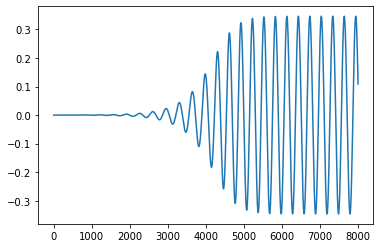

In [18]:
# plt.plot(x_test_sim[:,0])
plt.plot(x_test_sim[:,1])

In [19]:
TD_Embed_vec

array([-2.  , -1.98, -1.96, -1.94, -1.92, -1.9 , -1.88, -1.86, -1.84,
       -1.82, -1.8 , -1.78, -1.76, -1.74, -1.72, -1.7 , -1.68, -1.66,
       -1.64, -1.62, -1.6 , -1.58, -1.56, -1.54, -1.52, -1.5 , -1.48,
       -1.46, -1.44, -1.42, -1.4 , -1.38, -1.36, -1.34, -1.32, -1.3 ,
       -1.28, -1.26, -1.24, -1.22, -1.2 , -1.18, -1.16, -1.14, -1.12,
       -1.1 , -1.08, -1.06, -1.04, -1.02, -1.  , -0.98, -0.96, -0.94,
       -0.92, -0.9 , -0.88, -0.86, -0.84, -0.82, -0.8 , -0.78, -0.76,
       -0.74, -0.72, -0.7 , -0.68, -0.66, -0.64, -0.62, -0.6 , -0.58,
       -0.56, -0.54, -0.52, -0.5 , -0.48, -0.46, -0.44, -0.42, -0.4 ,
       -0.38, -0.36, -0.34, -0.32, -0.3 , -0.28, -0.26, -0.24, -0.22,
       -0.2 , -0.18, -0.16, -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04,
       -0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,
        0.16,  0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,
        0.34,  0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,
        0.52,  0.54,

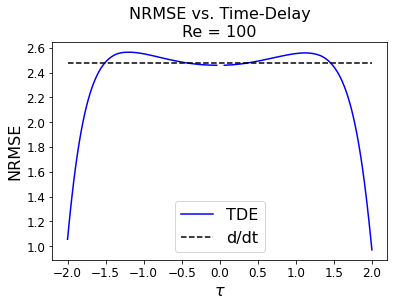

In [21]:

# NRMSE_ddt_SS5 = Re50__NRMSE_ddt_SS5


# NRMSE_ddt_SS5 = Re62__NRMSE_ddt_SS5
# point_remove = (NRMSE_Sys[int(TD_Embed_n/2)+2] + NRMSE_Sys[int(TD_Embed_n/2)-2])/2


# NRMSE_ddt_SS5 = Re75__NRMSE_ddt_SS5
# point_remove = (NRMSE_Sys[int(TD_Embed_n/2)+2] + NRMSE_Sys[int(TD_Embed_n/2)-2])/2


NRMSE_ddt_SS5 = Re100__NRMSE_ddt_SS1


plt.figure()
plt.plot( TD_Embed_vec[:int(TD_Embed_n/2)-1]   , NRMSE_Sys[:int(TD_Embed_n/2)-1]   , 'b' , label='TDE' )
plt.plot( TD_Embed_vec[3+int(TD_Embed_n/2):] , NRMSE_Sys[3+int(TD_Embed_n/2):] , 'b'  )
# plt.plot( TD_Embed_vec[int(TD_Embed_n/2)], point_remove , 'bo', markersize=8, fillstyle='none' )

plt.plot( [TD_Embed_vec[0],TD_Embed_vec[-1]] , [NRMSE_ddt_SS5,NRMSE_ddt_SS5] ,'k--' , label='d/dt' )


plt.xlabel(r'$\tau$' , fontsize=16)
plt.ylabel('NRMSE' , fontsize=16)

ttl_str = 'NRMSE vs. Time-Delay' + '\nRe = ' + str(Re)
plt.title(ttl_str , fontsize = 16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=16)

plt.show()


In [ ]:


plt.figure()
plt.plot( TD_Embed_vec , NRMSE_Sys, 'b' , label='TDE' )

plt.plot( [TD_Embed_vec[0],TD_Embed_vec[-1]] , [NRMSE_ddt_SS5,NRMSE_ddt_SS5] ,'k--' , label='d/dt' )

plt.xlabel(r'$\tau$' , fontsize=16)
plt.ylabel('NRMSE' , fontsize=16)

ttl_str = 'NRMSE vs. Time-Delay' + '\nRe = ' + str(Re)
plt.title(ttl_str , fontsize = 16)

plt.legend()

plt.show()



In [ ]:


np.save('Re' + str( Re) + '_Coefs_u1.npy' , Coefs_u1)
np.save('Re' + str( Re) + '_Coefs_u2.npy' , Coefs_u2)
np.save('Re' + str( Re) + '_TD_Embed_vec' , TD_Embed_vec)
np.save('Re' + str( Re) + '_NRMSE_Sys'    , NRMSE_Sys)


np.save('Re' + str( Re) + '_t_trm_1.npy' , t_trm_1)
np.save('Re' + str( Re) + '_t_trm_2.npy' , t_trm_2)
np.save('Re' + str( Re) + '_tde_mult.npy' , tde_mult)


